<a href="https://colab.research.google.com/github/CARC2806/FM/blob/main/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

#Part A

##Weekend Effect

In [12]:
apple = pd.read_csv('/content/AAPL (1).csv')

In [13]:
apple = apple[['Date', 'Adj Close']]
apple = apple.rename(columns={'Adj Close': 'Price'})
apple

,Date,Price
0,2018-09-18,52.253944
1,2018-09-19,52.285072
2,2018-09-20,52.682541
3,2018-09-21,52.115070
4,2018-09-24,52.864510
...,...,...
1252,2023-09-11,179.360001
1253,2023-09-12,176.300003
1254,2023-09-13,174.210007
1255,2023-09-14,175.740005


In [14]:
apple = pd.DataFrame(apple)
apple

,Date,Price
0,2018-09-18,52.253944
1,2018-09-19,52.285072
2,2018-09-20,52.682541
3,2018-09-21,52.115070
4,2018-09-24,52.864510
...,...,...
1252,2023-09-11,179.360001
1253,2023-09-12,176.300003
1254,2023-09-13,174.210007
1255,2023-09-14,175.740005


In [15]:
wknd_apple = apple[pd.to_datetime(apple['Date']).dt.weekday.isin([0, 4])][['Date', 'Price',]]
print(wknd_apple)

            Date       Price
3     2018-09-21   52.115070
4     2018-09-24   52.864510
8     2018-09-28   54.049706
9     2018-10-01   54.413643
13    2018-10-05   53.702518
...          ...         ...
1243  2023-08-28  180.190002
1247  2023-09-01  189.460007
1251  2023-09-08  178.179993
1252  2023-09-11  179.360001
1256  2023-09-15  175.009995

[486 rows x 2 columns]


In [16]:
monday_close = wknd_apple[wknd_apple['Date'].apply(lambda x: pd.to_datetime(x).weekday() == 0)]['Price']
friday_close = wknd_apple[wknd_apple['Date'].apply(lambda x: pd.to_datetime(x).weekday() == 4)]['Price']
mean_monday = monday_close.mean()
mean_friday = friday_close.mean()
print('Mean monday:',mean_monday.round(2))
print('Mean friday',mean_friday.round(2))

Mean monday: 112.83
Mean friday 113.63


The average closing price for apple on Mondays is 112.83 USD and on fridays is on average 113.63 USD, this means that the weekend effect applies for Apple.

##Turn of the month Effect

In [17]:
trm = apple
trm['Date'] = pd.to_datetime(trm['Date'])
trm['Last_Days'] = trm['Date'].apply(lambda x: x.day > (x + pd.DateOffset(days=1)).day)
trm['First_Days'] = trm['Date'].apply(lambda x: x.day <= 3)
trm['Middle_Days'] = ~trm['Last_Days'] & ~trm['First_Days']

mean_last_days = trm[trm['Last_Days']]['Price'].mean()
mean_first_days = trm[trm['First_Days']]['Price'].mean()
mean_middle_days = trm[trm['Middle_Days']]['Price'].mean()

print("Mean Price Last Days:", mean_last_days.round(2))
print("Mean Price First Days:", mean_first_days.round(2))
print("Mean Price Middle Days:", mean_middle_days.round(2))

Mean Price Last Days: 117.36
Mean Price First Days: 116.17
Mean Price Middle Days: 113.5


The average price for the last days of the month and the first days of the month are higher than the average prices for the middle days, this means that the turn of the month effect holds for Apple.

##Turn of the year Effect

In [18]:
warnings.filterwarnings('ignore')
trny = apple[['Date','Price']]
volume = pd.read_csv('/content/AAPL (1).csv')
volume = volume['Volume']
trny['Volume'] = volume
trny["Last Week"] = trny['Date'].apply(lambda x: x.day >= 25)
trny['December'] = trny['Date'].apply(lambda x: x.month == 12)
mean_december = trny[(trny['Last Week']) & (trny['December'])]['Price'].mean()
volume_mean_december = trny[(trny['Last Week']) & (trny['December'])]['Volume'].mean()
trny["First Half"] = trny['Date'].apply(lambda x: x.day <= 15)
trny['January'] = trny['Date'].apply(lambda x: x.month == 1)
mean_january = trny[(trny['First Half']) & (trny['January'])]['Price'].mean()
volume_mean_january = trny[(trny['First Half']) & (trny['January'])]['Volume'].mean()
trny['First January'] = trny['First Half'] & trny['January']
trny['Last December'] = trny['Last Week'] & trny['December']
trny['Rest of the year'] = ~trny['Last December'] & ~trny['First January']
mean_rest = trny[trny['Rest of the year']]['Price'].mean()
volume_mean_rest = trny[trny['Rest of the year']]['Volume'].mean()
print("Mean Price Rest of the Year", mean_rest.round(2))
print("Mean Volume Rest of the Year", int(volume_mean_rest.round()))
print("Mean Price First Half of January", mean_january.round(2))
print("Mean Volume First Half of January", int(volume_mean_january.round()))
print("Mean Price Last Week of December", mean_december.round(2))
print("Mean Volume Last Week of December", int(volume_mean_december.round()))

Mean Price Rest of the Year 114.17
Mean Volume Rest of the Year 107440024
Mean Price First Half of January 107.71
Mean Volume First Half of January 119715059
Mean Price Last Week of December 112.54
Mean Volume Last Week of December 110896171


The average price of the first half of january and the last week of december, is lower than the average price of the rest of the year, this means that the turn of the year effect doesn't hold for apple. However the volume for the first half of january and the last week of december is higher than the rest of the year on average.

##January Effect

In [19]:
spx = pd.read_csv('/content/^SPX (1).csv')
spx = spx[['Date','Adj Close']]
spx = spx.rename(columns={'Adj Close': 'Price'})
apple = apple[['Date','Price']]
spx['Date'] = pd.to_datetime(spx['Date'])
spx['Return'] = spx['Price'].pct_change() * 100
apple['Date'] = pd.to_datetime(apple['Date'])
apple['Return'] = trm['Price'].pct_change() * 100
spx["First Weeks"] = spx['Date'].apply(lambda x: x.day <= 18)
spx['January'] = spx['Date'].apply(lambda x: x.month == 1)
apple["First Weeks"] = apple['Date'].apply(lambda x: x.day <= 18)
apple['January'] = apple['Date'].apply(lambda x: x.month == 1)
mean_spx = spx[(spx['First Weeks']) & (trny['January'])]['Return'].mean()
mean_apple = apple[(apple['First Weeks']) & (trny['January'])]['Return'].mean()
print("Apple return Mean", mean_apple.round(2))
print("S&P 500 return Mean", mean_spx.round(2))

Apple return Mean 0.07
S&P 500 return Mean 0.14


The S&P 500 return for the first weeks of january are on average higher than the return for the same period for Apple. However, Apple is not a small company so the January effect doesn't apply either way.

#Part B

##Comparison Small vs Large Cap

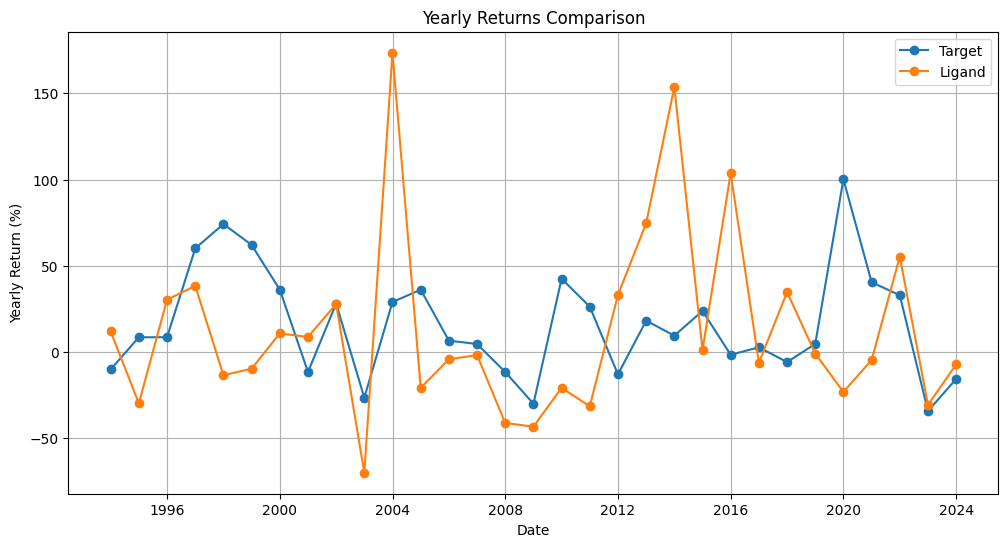

In [20]:
target = pd.read_csv('/content/TGT.csv')
ligand = pd.read_csv('/content/LGND.csv')
target = target[['Date', 'Adj Close']]
ligand = ligand[['Date', 'Adj Close']]
target['Return'] = target['Adj Close'].pct_change() * 100
ligand['Return'] = ligand['Adj Close'].pct_change() * 100
target['Date'] = pd.to_datetime(target['Date'])
ligand['Date'] = pd.to_datetime(ligand['Date'])
target['Year'] = target['Date'].dt.year
ligand['Year'] = ligand['Date'].dt.year

target = target.set_index('Date')
ligand = ligand.set_index('Date')
target_yearly = target.resample('Y').last()
ligand_yearly = ligand.resample('Y').last()
target_yearly['Yearly_Return'] = target_yearly['Adj Close'].pct_change() * 100
ligand_yearly['Yearly_Return'] = ligand_yearly['Adj Close'].pct_change() * 100


plt.figure(figsize=(12, 6))
plt.plot(target_yearly.index, target_yearly['Yearly_Return'], label='Target', marker='o')
plt.plot(ligand_yearly.index, ligand_yearly['Yearly_Return'], label='Ligand', marker='o')
plt.legend()
plt.title('Yearly Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Yearly Return (%)')
plt.grid(True)
plt.show()

This graph shows that the small stock (Ligand) is more volatile than the large stock (Target).

In [25]:
comparison = pd.DataFrame({
    'Target': target_yearly['Yearly_Return'],
    'Ligand': ligand_yearly['Yearly_Return']
})
comparison = comparison.iloc[1:]

In [26]:
initial_investment = 100
final_amount_target = initial_investment
final_amount_ligand = initial_investment

for index, row in comparison.iterrows():
    final_amount_target *= (1 + row['Target']/100)
    final_amount_ligand *= (1 + row['Ligand']/100)

print(f"Your investment in Target would be worth ${final_amount_target.round(2)} after the years.")
print(f"Your investment in Ligand would be worth ${final_amount_ligand.round(2)} after the years.")


Your investment in Target would be worth $3413.09 after the years.
Your investment in Ligand would be worth $210.34 after the years.


In this case small stocks do not outperform large stocks because as the previous code shows, an investment of 100 USD would be worth 3413.09 USD if invested in Target (large stock) but i would only be worth 210.34 USD if invested in Lingand (small stock).